In [2]:
from tensorflow import keras
from sklearn.model_selection import train_test_split
from keras.layers import Dense, Activation

(train_input, train_target),(test_input, test_target) =keras.datasets.fashion_mnist.load_data()

train_scaled = train_input.reshape(-1,28,28,1)/255.0

train_scaled,val_scaled,train_target,val_target = train_test_split(
train_scaled,train_target,test_size=0.2,random_state=42)

In [3]:
model = keras.Sequential()
model.add(keras.layers.Conv2D(32,kernel_size=3, activation='relu',padding = 'same',input_shape=(28,28,1)))
model.add(keras.layers.MaxPooling2D(2))

In [4]:
model.add(keras.layers.Conv2D(64,kernel_size=(3,3), activation='relu',padding='same'))
model.add(keras.layers.MaxPooling2D(2))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100,activation='relu'))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(10,activation='softmax'))



In [7]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics='accuracy')

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-cnn-model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2,restore_best_weights=True)

history = model.fit(train_scaled,train_target,epochs=20,
                   validation_data=(val_scaled,val_target),
                   callbacks=[checkpoint_cb,early_stopping_cb])

Epoch 1/20
1500/1500 [==============================] - 10s 7ms/step - loss: 0.5343 - accuracy: 0.8064 - val_loss: 0.3396 - val_accuracy: 0.8744
Epoch 2/20
1500/1500 [==============================] - 10s 7ms/step - loss: 0.3532 - accuracy: 0.8719 - val_loss: 0.2909 - val_accuracy: 0.8934
Epoch 3/20
1500/1500 [==============================] - 10s 7ms/step - loss: 0.3021 - accuracy: 0.8908 - val_loss: 0.2667 - val_accuracy: 0.8999
Epoch 4/20
1500/1500 [==============================] - 10s 7ms/step - loss: 0.2726 - accuracy: 0.8997 - val_loss: 0.2473 - val_accuracy: 0.9063
Epoch 5/20
1500/1500 [==============================] - 11s 7ms/step - loss: 0.2457 - accuracy: 0.9097 - val_loss: 0.2375 - val_accuracy: 0.9127
Epoch 6/20
1500/1500 [==============================] - 10s 7ms/step - loss: 0.2306 - accuracy: 0.9153 - val_loss: 0.2206 - val_accuracy: 0.9202
Epoch 7/20
1500/1500 [==============================] - 11s 7ms/step - loss: 0.2121 - accuracy: 0.9216 - val_loss: 0.2227 - val_ac

375/375 [==============================] - 1s 2ms/step - loss: 0.2206 - accuracy: 0.9202


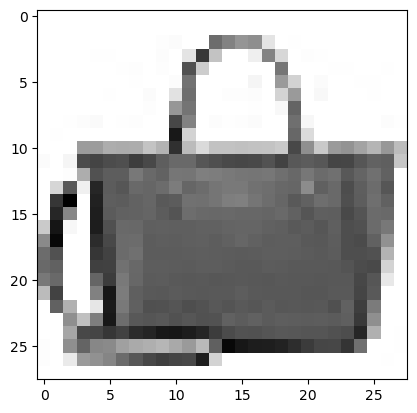

1/1 [==============================] - 0s 60ms/step
[[3.5959442e-14 9.8162412e-23 7.8403735e-18 8.6090413e-15 3.6385871e-15
  3.7009318e-18 1.6986758e-17 2.3366196e-15 1.0000000e+00 4.7635403e-19]]


In [9]:
import matplotlib.pyplot as plt

model.evaluate(val_scaled,val_target)
plt.imshow(val_scaled[0].reshape(28,28),cmap='gray_r')
plt.show()

preds = model.predict(val_scaled[0:1])
print(preds)


In [10]:
test_scaled = test_input.reshape(-1,28,28,1)/255.0
model.evaluate(test_scaled,test_target)

313/313 [==============================] - 1s 2ms/step - loss: 0.2432 - accuracy: 0.9131


[0.24315442144870758, 0.913100004196167]